## Problem Description

You can use the code below to get the closing prices of stock data, as shown in the cell below.

Please write a program to fetch the closing prices of stock data for the past 3 months for three stocks from yfinance e.g., `['AOT.BK', 'GULF.BK', 'CPALL.BK']`. Then:
1. [Task1] Display all stock prices using Plotly, with different colors for each stock name.
2. [Task2] Display a blue line for the upper bound of the closing price of all stocks on each day, and use a red line for the lower bound of the closing price on each day. Display the remaining data in grey.
3. [Task3] Fetch data for four stocks: ['PTT.BK', 'AOT.BK', 'GULF.BK', 'CPALL.BK']. Normalize all closing prices to a range of 0 to 1, and plot the data using the same colors as specified in the [Task2].




In [ ]:
"""
import yfinance as yf
from datetime import date, timedelta

tickers = ['PTT.BK']
end_date = date.today()
start_date = end_date - timedelta(days=90)  # 3 months ago
data = yf.download(tickers, start=start_date, end=end_date)
closing_prices = data['Close']
closing_prices
"""

Expected Outputs:
[Task1]
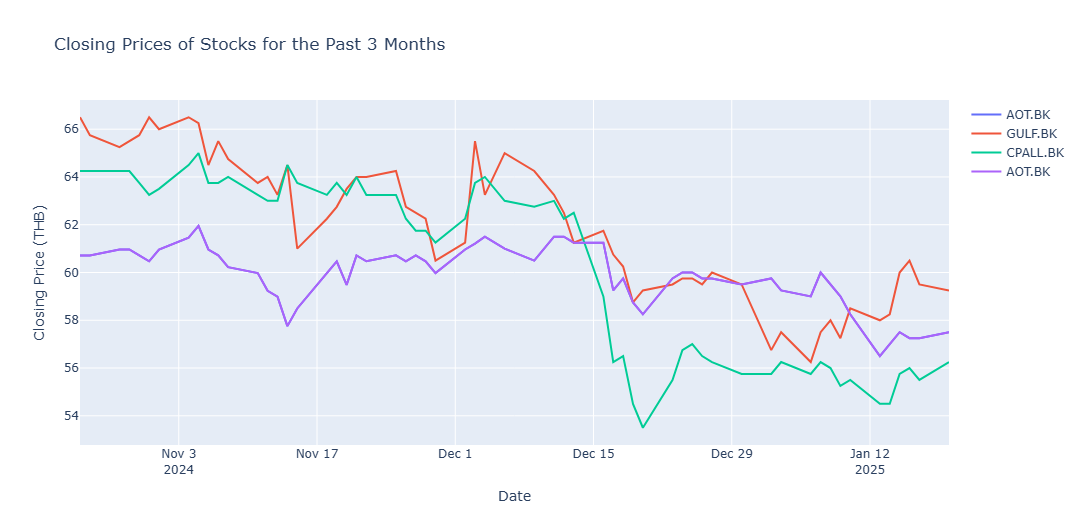

[Task2]
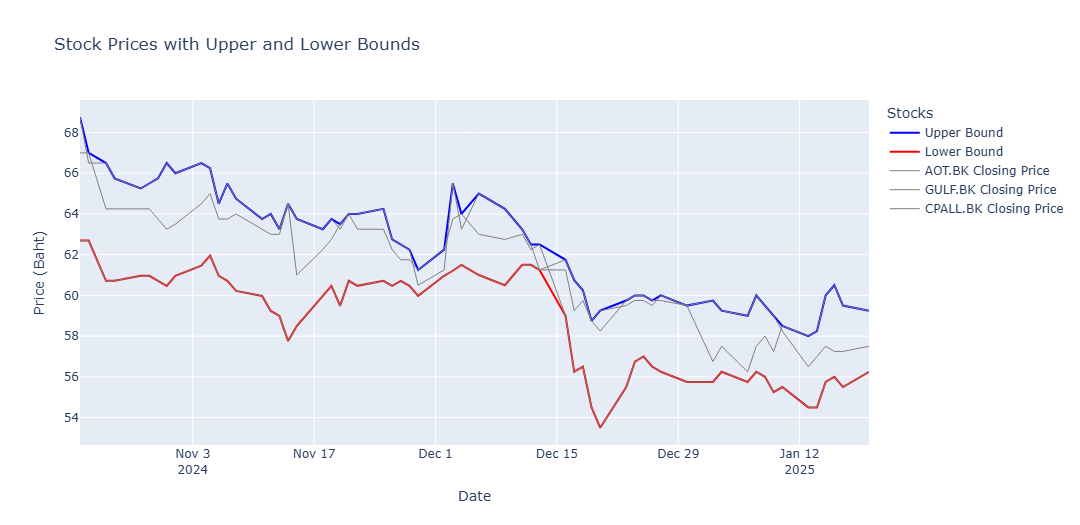

[Task3]
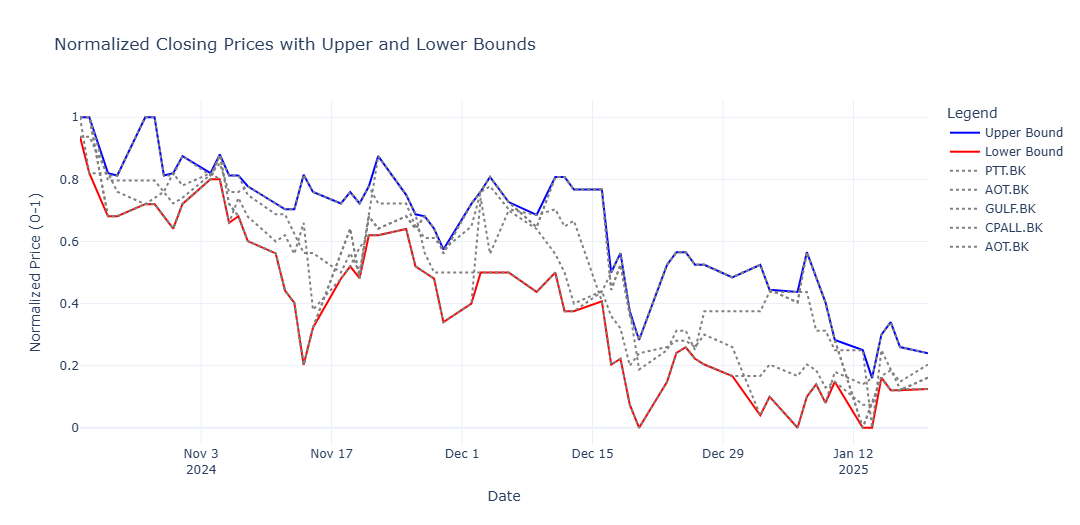

### Imports and Stuff

In [18]:
from datetime import date, timedelta
import plotly.graph_objs as go
import yfinance as yf

# Fetch stock data for Task 1 and Task 2
tickers_task1 = ["AOT.BK", "GULF.BK", "CPALL.BK"]
end_date = date.today()
start_date = end_date - timedelta(days=90)  # 3 months ago

# Download data
stock_data = yf.download(tickers_task1, start=start_date, end=end_date)
closing_prices = stock_data["Close"]

[*********************100%***********************]  3 of 3 completed


### [Task1]

In [19]:
# Plot all stock prices (Task 1)
fig = go.Figure()

# Add lines for each stock
for ticker in tickers_task1:
    fig.add_trace(
        go.Scatter(
            x=closing_prices.index, y=closing_prices[ticker], mode="lines", name=ticker
        )
    )

fig.update_layout(
    title="Closing Prices of Stocks (Task 1)",
    xaxis_title="Date",
    yaxis_title="Closing Price (THB)",
)
fig.show()

### [Task2]

In [20]:
# Task 2: Upper and lower bounds for each day
upper_bound = closing_prices.max(axis=1)
lower_bound = closing_prices.min(axis=1)

fig_task2 = go.Figure()
fig_task2.add_trace(
    go.Scatter(
        x=closing_prices.index,
        y=upper_bound,
        line=dict(color="blue", width=2),
        name="Upper Bound",
    )
)
fig_task2.add_trace(
    go.Scatter(
        x=closing_prices.index,
        y=lower_bound,
        line=dict(color="red", width=2),
        name="Lower Bound",
    )
)

for ticker in tickers_task1:
    fig_task2.add_trace(
        go.Scatter(
            x=closing_prices.index,
            y=closing_prices[ticker],
            mode="lines",
            line=dict(color="grey", width=1),
            name=f"{ticker} Prices",
        )
    )

fig_task2.update_layout(
    title="Stock Prices with Upper and Lower Bounds (Task 2)",
    xaxis_title="Date",
    yaxis_title="Price (THB)",
)
fig_task2.show()

### [Task3]

In [21]:
# Task 3: Normalize and plot data for five stocks
tickers_task3 = ["PTT.BK", "AOT.BK", "GULF.BK", "CPALL.BK"]
stock_data_task3 = yf.download(tickers_task3, start=start_date, end=end_date)
closing_prices_task3 = stock_data_task3["Close"]

# Normalize the data to range [0, 1]
normalized_prices = (closing_prices_task3 - closing_prices_task3.min()) / (
    closing_prices_task3.max() - closing_prices_task3.min()
)
upper_bound = normalized_prices.max(axis=1)
lower_bound = normalized_prices.min(axis=1)

# Plot normalized data
fig_task3 = go.Figure()
fig_task3.add_trace(
    go.Scatter(
        x=normalized_prices.index,
        y=upper_bound,
        line=dict(color="blue", width=2),
        name="Upper Bound",
    )
)
fig_task3.add_trace(
    go.Scatter(
        x=normalized_prices.index,
        y=lower_bound,
        line=dict(color="red", width=2),
        name="Lower Bound",
    )
)
for i, ticker in enumerate(tickers_task3):
    fig_task3.add_trace(
        go.Scatter(
            x=normalized_prices.index,
            y=normalized_prices[ticker],
            mode="lines",
            line=dict(color="grey", width=1, dash="dot"),
            name=f"{ticker}",
        )
    )

fig_task3.update_layout(
    title="Normalized Stock Prices (Task 3)",
    xaxis_title="Date",
    yaxis_title="Normalized Price (0 to 1)",
)
fig_task3.show()

[*********************100%***********************]  4 of 4 completed
